In [1891]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1892]:
ds=pd.read_csv('power_plant_database.csv')
ds.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [1893]:
df=pd.DataFrame(data=ds)
df.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1894]:
df.shape

(907, 27)

In [1895]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

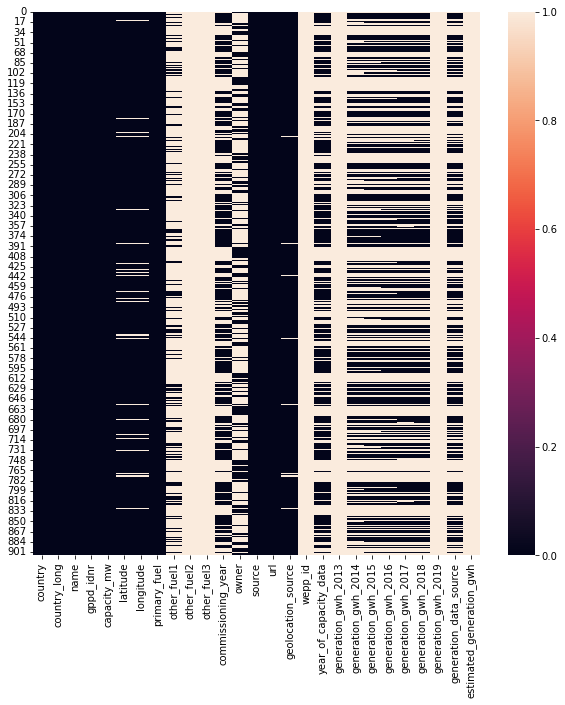

In [1896]:
plt.figure(figsize=[10,10])
sns.heatmap(df.isnull())
plt.show()

The above shows that there are huge number of null values in the data, thus columns with more than 60% null values out of the entire dataframe (907) will be dropped.

In [1897]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','generation_gwh_2013',
         'generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [1898]:
#Dropping other irrelevant columns

In [1899]:
df.drop(['country','country_long','url','year_of_capacity_data','generation_data_source','commissioning_year'],
        axis=1,inplace=True) 

#the data found in these columns are the same in all axis hence adds nothing to the dataset

In [1900]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [1901]:
df.shape

(907, 13)

In [1902]:
#Filling the null values in the dataset

In [1903]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy='mean')

In [1904]:
list=['latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016',
      'generation_gwh_2017','generation_gwh_2018']
for i in list:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [1905]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy='most_frequent')

df['geolocation_source']=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))


In [1906]:
df.isnull().sum()

name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

All Null values has been corrected

In [1907]:
df.dtypes.sort_values()

capacity_mw            float64
latitude               float64
longitude              float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
name                    object
gppd_idnr               object
primary_fuel            object
source                  object
geolocation_source      object
dtype: object

In [1908]:
#Converting Strings in data into integers

In [1909]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [1910]:
list3=['primary_fuel','name','gppd_idnr','source','geolocation_source']

for i in list3:
    df[i]=le.fit_transform(df[i])


In [1911]:
df.dtypes.sort_values()

name                     int64
gppd_idnr                int64
primary_fuel             int64
source                   int64
geolocation_source       int64
capacity_mw            float64
latitude               float64
longitude              float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [1912]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
name,907.0,453.000000,261.972645,0.0000,226.500000,453.000000,679.500000,906.000
gppd_idnr,907.0,453.000000,261.972645,0.0000,226.500000,453.000000,679.500000,906.000
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.464907,4.812291,68.6447,74.388900,76.979200,79.206100,95.408
primary_fuel,907.0,3.206174,2.280652,0.0000,1.000000,3.000000,6.000000,7.000
source,907.0,43.847850,44.642818,0.0000,22.000000,22.000000,29.500000,190.000
geolocation_source,907.0,1.733186,0.677151,0.0000,2.000000,2.000000,2.000000,2.000
generation_gwh_2014,907.0,2431.823590,2665.338608,0.0000,1211.362750,2431.823590,2431.823590,28127.000
generation_gwh_2015,907.0,2428.226946,2859.349132,0.0000,916.000000,2428.226946,2428.226946,30539.000


The following can be observed from the above.
1. The mean for capacity_mw is more than the 50th percentile
2. The mean for 'source' is greater than the 50th percentile


In [1913]:
df.corr()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
name,1.000000,0.332205,0.060240,-0.135247,0.020279,0.040753,-1.463951e-02,3.622452e-02,8.375890e-02,7.366460e-02,6.617668e-02,7.363387e-02,6.663814e-02
gppd_idnr,0.332205,1.000000,-0.335742,-0.105728,-0.377812,0.609180,4.163838e-01,-4.641741e-01,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02
capacity_mw,0.060240,-0.335742,1.000000,0.050984,0.195882,-0.380395,-2.421218e-01,2.048653e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01
latitude,-0.135247,-0.105728,0.050984,1.000000,0.036362,-0.010204,5.592656e-02,-1.842751e-01,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02
longitude,0.020279,-0.377812,0.195882,0.036362,1.000000,-0.347948,-2.393334e-01,2.523426e-01,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02
primary_fuel,0.040753,0.609180,-0.380395,-0.010204,-0.347948,1.000000,5.361263e-02,-4.832168e-01,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01
source,-0.014640,0.416384,-0.242122,0.055927,-0.239333,0.053613,1.000000e+00,-5.057202e-01,-7.136539e-17,-2.160931e-17,-1.636718e-17,-6.157496e-20,1.092118e-17
geolocation_source,0.036225,-0.464174,0.204865,-0.184275,0.252343,-0.483217,-5.057202e-01,1.000000e+00,1.557310e-17,-6.339264e-18,1.115708e-17,-9.450976e-18,-1.048582e-17
generation_gwh_2014,0.083759,0.044518,0.694350,0.044321,0.011472,-0.124769,-7.136539e-17,1.557310e-17,1.000000e+00,9.535943e-01,9.258738e-01,8.916868e-01,8.849556e-01
generation_gwh_2015,0.073665,0.038958,0.711190,0.036398,0.018818,-0.124828,-2.160931e-17,-6.339264e-18,9.535943e-01,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01


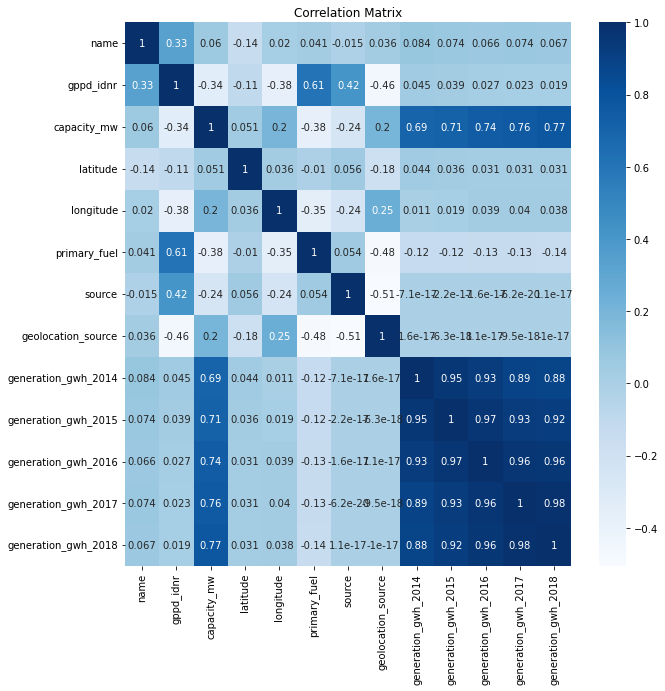

In [1914]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix.jpg')
plt.show()

In [1915]:
df.corr()['capacity_mw'].sort_values(ascending=False)

capacity_mw            1.000000
generation_gwh_2018    0.773456
generation_gwh_2017    0.757585
generation_gwh_2016    0.742221
generation_gwh_2015    0.711190
generation_gwh_2014    0.694350
geolocation_source     0.204865
longitude              0.195882
name                   0.060240
latitude               0.050984
source                -0.242122
gppd_idnr             -0.335742
primary_fuel          -0.380395
Name: capacity_mw, dtype: float64

The following can be observed in the above;
1. There is a high correlation between capacity and generation for all the years
2. The data also indicates a high correlation among the generation years, and the correlation value increases with  increasing years.
3. gppd, source, and primary fuel on the other hand correlates negatively with capacity with primary fuel having the highest negative correlation value.

In [1916]:
#checking skewness

In [1917]:
df.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

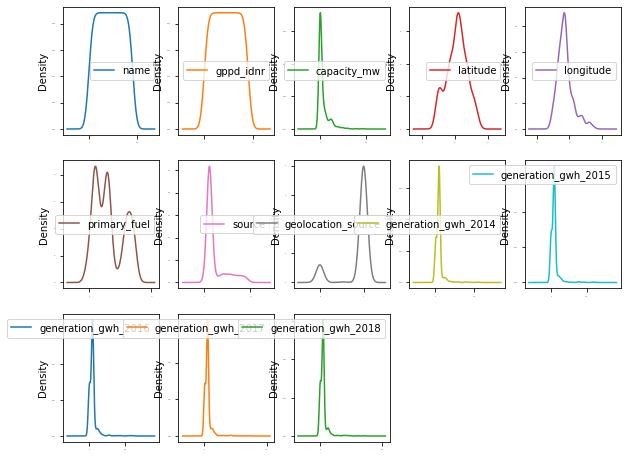

In [1918]:
df.plot(kind='density',subplots=True,sharex=False,fontsize=1,figsize=(10,8),layout=(3,5))
plt.show()

This indicates skewness in the data, hence the need to correct them. Even though there seem to be skewness in most of the columns, the correction could only be done with "Source" and "Longitude" columns, because the other columns have a high correlation with the output column.

In [1919]:
from scipy.stats import skew
from scipy.stats import boxcox

In [1920]:
df['longitude']=boxcox(df['longitude'],0)

In [1921]:
df['source']=np.sqrt(df['source'])

In [1922]:
#Rechecking skewness

In [1923]:
df.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            3.123576
latitude              -0.149698
longitude              0.933111
primary_fuel           0.472251
source                 1.506368
geolocation_source    -2.159841
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

In [1924]:
#Splitting the data

In [1936]:
x1=df.drop(['capacity_mw'],axis=1)
y1=df['capacity_mw']

In [1937]:
x1

,name,gppd_idnr,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,657,28.1839,4.293751,6,10.440307,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,519,24.7663,4.312261,1,13.190906,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2,853,21.9038,4.239501,7,4.582576,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3,0,23.8712,4.514810,2,4.690416,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1,21.9603,4.411696,1,4.690416,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,16.2949,4.348428,1,4.690416,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,903,822,12.8932,4.358827,6,8.774964,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,904,891,15.2758,4.325206,7,4.582576,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,905,539,24.3500,4.300650,1,7.681146,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [1938]:
x1.shape

(907, 12)

In [1939]:
y1

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

In [1940]:
y1.shape

(907,)

In [1794]:
#Scaling the x data

In [1795]:
from sklearn.preprocessing import MinMaxScaler

In [1796]:
mms=MinMaxScaler()

In [1797]:
for col in x:
    mms=MinMaxScaler()
    x[col]=mms.fit_transform(x[[col]])

In [1798]:
x1.head()

,name,gppd_idnr,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,657,28.1839,4.293751,6,10.440307,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,519,24.7663,4.312261,1,13.190906,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2,853,21.9038,4.239501,7,4.582576,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3,0,23.8712,4.514810,2,4.690416,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1,21.9603,4.411696,1,4.690416,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [1799]:
#Training dataset

In [1800]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [1801]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=42)

In [1802]:
x1_train.shape

(634, 12)

In [1803]:
x1_test.shape

(273, 12)

In [1804]:
y1_train.shape

(634,)

In [1805]:
y1_test.shape

(273,)

# Using Linear Regression to Predict 'Capacity'

In [1806]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)

LinearRegression()

In [1807]:
lr.coef_

array([ 2.54994641e-01, -5.97239379e-01, -1.50492221e-02,  1.86456315e+02,
       -3.28037820e+01, -3.16860389e+01, -5.83085261e+01,  2.59025067e-02,
       -4.86970469e-02,  4.21194090e-02, -4.72359779e-03,  1.33787199e-01])

In [1808]:
lr.intercept_

-318.8310181101236

In [1809]:
#predict the value

In [1810]:
pred=lr.predict(x1_test)
print('predict result price:',pred)
print('actual price:',y1_test)

predict result price: [ 2.78690662e+02 -1.74726693e+01  1.44309051e+02  1.95715893e+02
  4.63730791e+02  1.81316318e+02  1.45088477e+02 -4.89010225e+01
  2.90972752e+02  2.02314569e+02  2.64760928e+02  3.83348650e+02
 -1.10878275e+02  1.07724741e+02  1.74349188e+02  1.16865137e+01
 -1.04097321e+02  1.94074283e+02  8.16889197e+02  4.80037976e+02
 -1.12942763e+02 -9.03160373e+01  1.26898645e+00  1.97696668e+02
  1.55546431e+02  1.04119235e+01  9.99217645e+02 -1.27134011e+01
  4.79991254e+01  3.28479166e+01  3.97878875e+02  1.82977278e+02
  4.21573974e+02  5.00254234e+02  2.53686782e+01  1.85293033e+02
  1.45379177e+02  1.64993520e+02  4.82077868e+02  8.23669957e+01
  2.79830030e+02  2.83507175e+02  3.57602489e+02  1.26424239e+02
  4.55150021e+01  5.28223927e+02  1.81387642e+02  3.08819785e+01
  3.68112648e+02  2.13195152e+02  2.74896183e+01  4.79740764e+02
  1.04873923e+02  8.19098155e+02  2.12074819e+01  5.65184572e+01
  3.61704706e+02  1.98681274e+02  2.12613390e+02  1.06290199e+02
  1

In [1811]:
print('error:')
print('Mean absolute error:', mean_absolute_error(y1_test,pred))
print('Mean squared error:', mean_squared_error(y1_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y1_test,pred)))

error:
Mean absolute error: 198.2423072994291
Mean squared error: 97302.11286206899
Root mean squared error: 311.93286595366794


In [1812]:
from sklearn.metrics import r2_score
print(r2_score(y1_test,pred))

0.7691257918471931


# Using Logistic Regression to Predict 'Primary fuel'

In [1769]:
x2=df.drop(['primary_fuel'],axis=1)
y2=df['primary_fuel']

In [1770]:
from sklearn.naive_bayes import MultinomialNB

In [1771]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=.30,random_state=42)

In [1772]:
x2_train.shape

(634, 12)

In [1773]:
x2_test.shape

(273, 12)

In [1774]:
y2_train.shape

(634,)

In [1775]:
y2_test.shape

(273,)

In [1776]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [1777]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x2_train,y2_train)
predknn=knn.predict(x2_test)
print(accuracy_score(y2_test,predknn))
print(confusion_matrix(y2_test,predknn))
print(classification_report(y2_test,predknn))

0.684981684981685
[[ 5  4  0  0  0  0  0  0]
 [10 50  1 11  0  0  1  2]
 [ 1 10  3  9  0  0  0  1]
 [ 0  9  1 75  0  0  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  1  3  4  0  0  0  0]
 [ 0  0  0  0  0  0 24  3]
 [ 0  2  0  0  0  0 10 30]]
              precision    recall  f1-score   support

           0       0.31      0.56      0.40         9
           1       0.64      0.67      0.65        75
           2       0.33      0.12      0.18        24
           3       0.76      0.88      0.82        85
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8
           6       0.69      0.89      0.77        27
           7       0.83      0.71      0.77        42

    accuracy                           0.68       273
   macro avg       0.45      0.48      0.45       273
weighted avg       0.65      0.68      0.66       273



In [1778]:
dtc=DecisionTreeClassifier()
dtc.fit(x2_train,y2_train)
preddtc=dtc.predict(x2_test)
print(accuracy_score(y2_test,preddtc))
print(confusion_matrix(y2_test,preddtc))
print(classification_report(y2_test,preddtc))

0.7655677655677655
[[ 7  2  0  0  0  0  0  0]
 [ 5 53  6  9  0  2  0  0]
 [ 1  4 12  5  0  2  0  0]
 [ 0 10  8 65  0  2  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  3  1  1  0  3  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 42]]
              precision    recall  f1-score   support

           0       0.54      0.78      0.64         9
           1       0.72      0.71      0.71        75
           2       0.44      0.50      0.47        24
           3       0.80      0.76      0.78        85
           4       0.00      0.00      0.00         3
           5       0.33      0.38      0.35         8
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        42

    accuracy                           0.77       273
   macro avg       0.60      0.64      0.62       273
weighted avg       0.77      0.77      0.76       273



In [1779]:
accuracy_score=cross_val_score(dtc,x2,y2,cv=5)
print(accuracy_score)
print(accuracy_score.mean())
print(accuracy_score.std())

[0.74725275 0.76373626 0.81767956 0.75138122 0.73480663]
0.7629712828607855
0.028872929430713644


Prediction

In [1780]:
def primaryfuelprediction(p):
    p=p.reshape(1,-1)
    preddtc=dtc.predict(p)
    print('Primary fuel predicted is:', preddtc)

In [1781]:
p=np.array([0,657,28.1839,4.293751,6,10.440307,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099])
primaryfuelprediction(p)

Primary fuel predicted is: [6]
